In [1]:
import pandas as pd

# Read the dataset (replace 'crop_data.csv' with the actual file path)
df = pd.read_csv('datafile2.csv')


In [2]:
# Display basic information about the dataset
print(df.info())
print(df.describe())


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 49 entries, 0 to 48
Data columns (total 6 columns):
 #   Column                                 Non-Null Count  Dtype  
---  ------                                 --------------  -----  
 0   Crop                                   49 non-null     object 
 1   State                                  49 non-null     object 
 2   Cost of Cultivation (`/Hectare) A2+FL  49 non-null     float64
 3   Cost of Cultivation (`/Hectare) C2     49 non-null     float64
 4   Cost of Production (`/Quintal) C2      49 non-null     float64
 5   Yield (Quintal/ Hectare)               49 non-null     float64
dtypes: float64(4), object(2)
memory usage: 2.4+ KB
None
       Cost of Cultivation (`/Hectare) A2+FL  \
count                              49.000000   
mean                            20363.537347   
std                             13561.435306   
min                              5483.540000   
25%                             12774.410000   
50%      

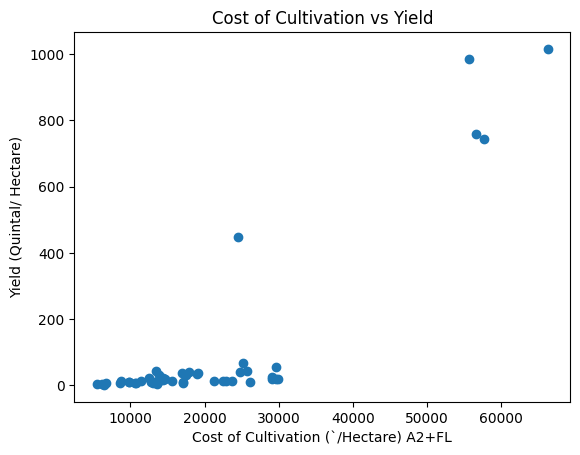

In [3]:
import matplotlib.pyplot as plt

# Example: Scatter plot of cost of cultivation vs. yield
plt.scatter(df['Cost of Cultivation (`/Hectare) A2+FL'], df['Yield (Quintal/ Hectare) '])
plt.title('Cost of Cultivation vs Yield')
plt.xlabel('Cost of Cultivation (`/Hectare) A2+FL')
plt.ylabel('Yield (Quintal/ Hectare)')
plt.show()


In [4]:
from sklearn.preprocessing import LabelEncoder

le_crop = LabelEncoder()
le_state = LabelEncoder()

df['Crop'] = le_crop.fit_transform(df['Crop'])
df['State'] = le_state.fit_transform(df['State'])


In [5]:
from sklearn.model_selection import train_test_split

X = df.drop(columns=['Yield (Quintal/ Hectare) '])
y = df['Yield (Quintal/ Hectare) ']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)


In [6]:
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error

model = LinearRegression()
model.fit(X_train, y_train)

# Make predictions
y_pred = model.predict(X_test)

# Evaluate model performance
mse = mean_squared_error(y_test, y_pred)
print(f"Mean Squared Error: {mse:.2f}")


Mean Squared Error: 19876.70


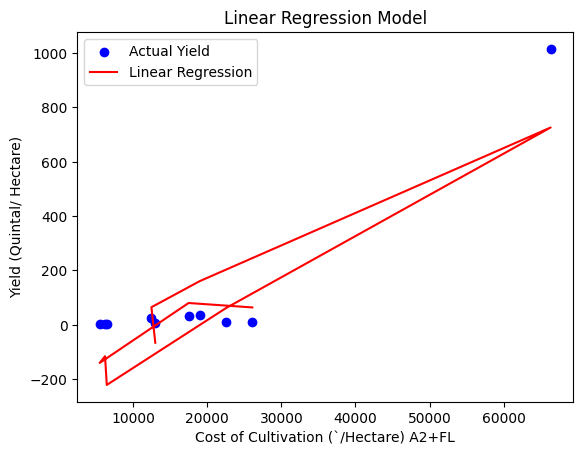

In [7]:
# Plot regression line for Linear Regression
plt.scatter(X_test['Cost of Cultivation (`/Hectare) A2+FL'], y_test, color='blue', label='Actual Yield')
plt.plot(X_test['Cost of Cultivation (`/Hectare) A2+FL'], y_pred, color='red', label='Linear Regression')
plt.xlabel('Cost of Cultivation (`/Hectare) A2+FL')
plt.ylabel('Yield (Quintal/ Hectare)')
plt.title('Linear Regression Model')
plt.legend()
plt.show()


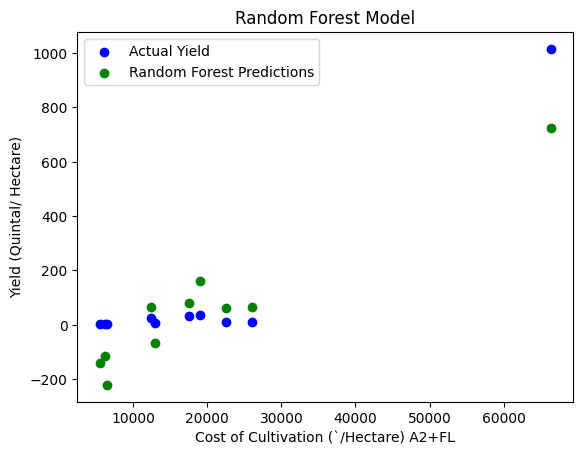

In [8]:
# Predictions for Random Forest
y_pred_rf = model.predict(X_test)

# Plot predictions for Random Forest
plt.scatter(X_test['Cost of Cultivation (`/Hectare) A2+FL'], y_test, color='blue', label='Actual Yield')
plt.scatter(X_test['Cost of Cultivation (`/Hectare) A2+FL'], y_pred_rf, color='green', label='Random Forest Predictions')
plt.xlabel('Cost of Cultivation (`/Hectare) A2+FL')
plt.ylabel('Yield (Quintal/ Hectare)')
plt.title('Random Forest Model')
plt.legend()
plt.show()


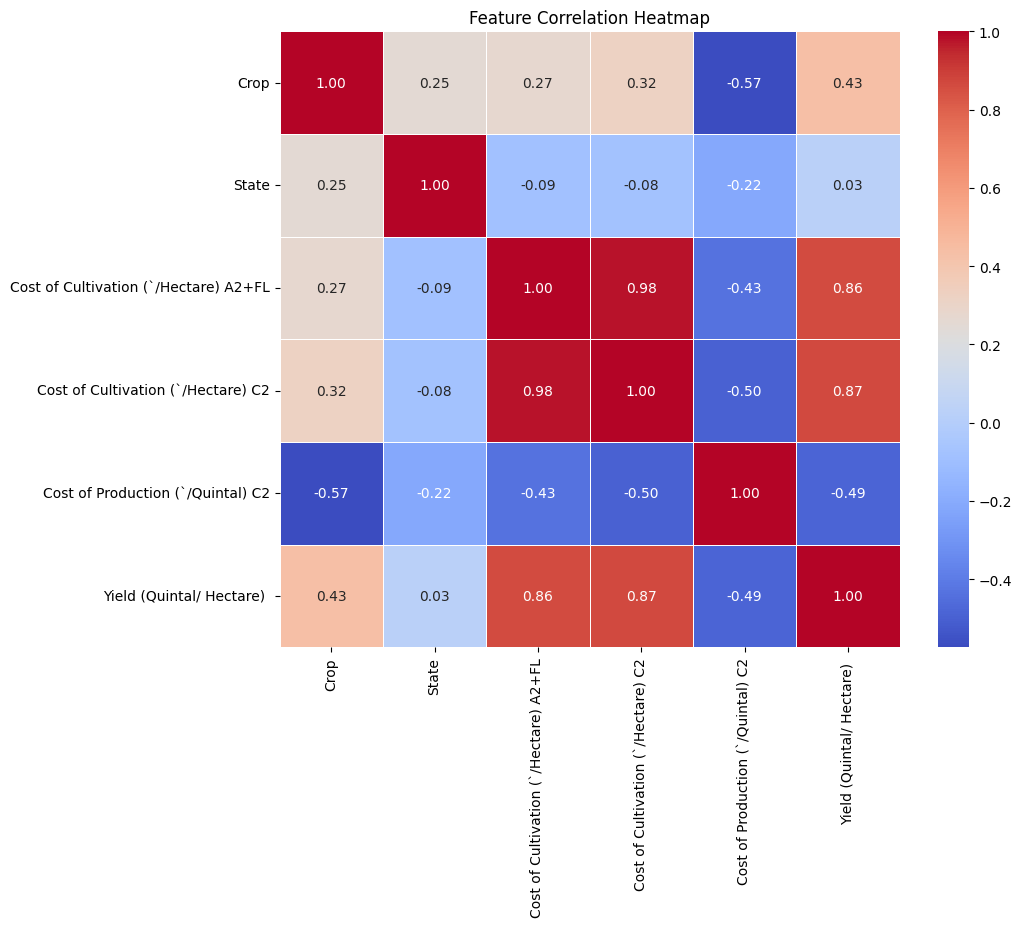

In [9]:
import seaborn as sns
import matplotlib.pyplot as plt

# Calculate the correlation matrix
corr_matrix = df.corr()

# Create a heatmap
plt.figure(figsize=(10, 8))
sns.heatmap(corr_matrix, annot=True, cmap='coolwarm', fmt='.2f', linewidths=0.5)
plt.title('Feature Correlation Heatmap')
plt.show()
